# Preamble:

CS390Z - Introduction to Data Mining - Fall 2021

Instructor: Thyago Mota

Description: Program 02

Author: Brandon Young

Description: This program is meant to demonstrate a method of creating classification models to predict the genre of a song baseed on given data.

# Introduction:

In this program, I intend to use the data provided from Kaggle in order to predict a song's genre using three different classification models; specifically, the goal is to use a decision tree, Bayes Classification, and ANN.

# Dataset:

The dataset in this instance is a CSV file that has been collected from Kaggle showing a list of songs and their genre. The CSV file consists of 42,305 songs with different genres and displays multiple attributes quantified in numbers. Among these are danceabiliyt, energy, key, loudness, speechiness, acousticness, instramentalness, liveness, valence, tempo, and duration_ms. There are other bits of information such as the ID, song name, and other unique identifiers.

# Preprocessing:

In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import csv, os, math, sys, re, random
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier



DATA_FOLDER = '../data'
CSV_FILE_NAME = 'C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv'

csv_reader = csv.reader(CSV_FILE_NAME)
df = pd.read_table(CSV_FILE_NAME, delimiter = ",")
random.seed(0)


print(CSV_FILE_NAME)
print(df.head())

C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                 

c:\users\brand\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


This section is used to import the resources needed to read the CSV files as well as prepare for the use of the decision tree and other functions.

In [5]:
dataset = pd.read_csv(CSV_FILE_NAME, low_memory=False)
dataset.shape
# This should show the shape of the rows and columns
dataset.head()

X = dataset.drop(['Unnamed: 0', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title', 'genre'], axis=1)

#Dropping several columns that aren't useful here

y = dataset['genre']

For the dataset, what we aim to do is drop all of the columns that don't allow us to predict any sort of data. This includes the empty columns and columns such as song names and so on.

We intentionally set the y value to be genre as this is what we want to predict in this case.

# Summary Statistics:

                danceability                                               \
                       count      mean       std     min      25%     50%   
genre                                                                       
Dark Trap             4578.0  0.618834  0.161002  0.0979  0.51525  0.6245   
Emo                   1680.0  0.493699  0.126014  0.1110  0.41500  0.4910   
Hiphop                3028.0  0.698982  0.142183  0.1970  0.60575  0.7170   
Pop                    461.0  0.676807  0.119175  0.2090  0.60200  0.6870   
Rap                   1848.0  0.742877  0.127670  0.2410  0.67100  0.7570   
RnB                   2099.0  0.674206  0.140207  0.1910  0.58800  0.6880   
Trap Metal            1956.0  0.647564  0.169564  0.0651  0.54000  0.6700   
Underground Rap       5875.0  0.744658  0.128180  0.2410  0.67200  0.7660   
dnb                   2966.0  0.520944  0.106605  0.1380  0.44900  0.5170   
hardstyle             2936.0  0.478027  0.099230  0.0891  0.42500  0.4890   

<AxesSubplot:ylabel='Frequency'>

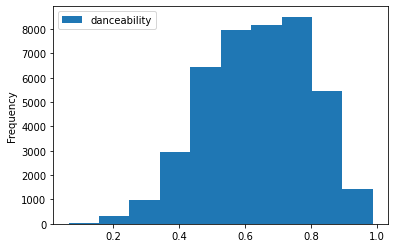

In [6]:
print(dataset[['danceability','genre']].groupby('genre').describe())
print(dataset[['energy','genre']].groupby('genre').describe())
#print(summary)
#print(df['genre'].unique())

danceTest = df[['danceability','genre']].groupby('genre')
#print(danceTest) this fookin works
#danceTest.plot(y='danceability', x='genre',kind='box')
#danceTest.plot(x='genre', y='danceability', kind='hist')
dataset.plot(x='genre', y='danceability',kind='hist')
#danceTest.plot(x='genre',y='danceability',kind='box')
#plt.hist()

# Classification Models:

Decision Tree Inference:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(y_predict)

[[370  25  42   8  39  26 110 178  11  19   5  16  15  39  39]
 [ 17 169  16   8   4  25  11  15   8  11   0   1   0   4   8]
 [ 68  19 193  14  49  87  19 154   6   3   0   3   0   2   4]
 [  7  22   7   3   2  19   3   8   0   1   0   8   0   3   1]
 [ 32   5  46   5 143  30  14  92   0   0   0   1   1   0   2]
 [ 43  31 102  21  36 129  11  66   3   1   0   1   0   3   5]
 [130  11  12   3   8   9  78 116   3   7   0   2   0   6   9]
 [262  17 210  16 124  67 148 328   2   6   0   6   1   6   4]
 [ 10   6   3   1   1   2   0   3 547   0   0   0   0   0   0]
 [ 14   8   4   0   0   1   4   4   1 486   5   0   0   0  49]
 [  6   0   0   1   0   1   1   1   0   9 516   0  16  44   5]
 [ 17   5   0   0   1   3   4   5   0   0   1 492  59   8   1]
 [  6   0   0   0   0   0   1   2   0   0  26  49 452  32   1]
 [ 40   3   3   0   1   3   6   0   0   3  30   7  25 460   7]
 [ 28  16  11   2   5   5  18   8   1  50   3   0   0   5 449]]
                 precision    recall  f1-score   suppo

Bayes Classification:

In [13]:
rows_train = random.sample(range(len(dataset)),k=int(len(dataset)*.2))

df_train = pd.DataFrame(columns = dataset.columns)
df_test = pd.DataFrame(columns = dataset.columns)
for i, row dataset.iterrows():
    df_train = dftrain.append(row)
else:
    df_test = df_test.append(row)

IndentationError: unexpected indent (Temp/ipykernel_26364/2611342337.py, line 5)

ANN:

In [24]:
df_train, df_test = train_test_split(X, test_size=0.2, random_state=0)

# X is actually the filtered dataset

min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(df_train.iloc[:,:-1].values)
X_test = min_max_scaler.fit_transform(df_test.iloc[:,:-1].values)

Y_train = df_train.iloc[:,-1].values
Y_test = df_test.iloc[:,-1].values

classify = MLPClassifier(hidden_layer_sizes=(2,4), max_iter=5000, random_state=0)

classify.fit(X_train,Y_train)


print("Accuracy:")
print(clf.score(X_test,Y_test))


Accuracy:
0.9568608911476185
